In [1]:
envname = 'variables/loop_stim10e-16.0et6.0ph1.0p1.0tvaryplNonebp0.5.pkl'

In [2]:
# import stuff
from placerg.funcs import *
from placerg.objects import*
from placerg.funcsrg import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

In [3]:
# set up notebook displayt
np.set_printoptions(threshold=5)
alpha=0.4
color='black'
cmap='Greys'
colorline='black'
linethick=3.
colorfit='grey'
plt.style.use('seaborn-paper')
fontsize=20
ticksize=20
fontsizesmall=25
ticksizesmall=20
legendsize=20
alpha=.3
colorfit='gray'
linecolor='black'
palit=['black','firebrick', 'crimson', 'orangered', 'darkorange', 'goldenrod', 'gold', 'khaki']
mycmap = cm.gnuplot
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
# load in objects
allo=load_object(envname)


In [5]:
print(allo.label)

[0.05, 0.15, 0.1, 0.25, 0.2, 0.35, 0.3, 0.45, 0.4, 0.55, 0.5, 0.65, 0.6, 0.75, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 2.0, 3.0, 5.0, 5.0, 0.18502565539801977, 0.08813442910468991, 0.08467245646272993, 0.09696825077997, 0.09362474229163407]


In [6]:
if allo.labeltype[0]=='eta':
    maxx=np.max(np.array(allo.eta).flatten())
    minn=np.min(np.array(allo.eta).flatten())
    cc=allo.eta
if allo.labeltype[0]=='epsilon':
    maxx=np.max(np.array(allo.epsilon).flatten())
    minn=np.min(np.array(allo.epsilon).flatten())
    cc=allo.epsilon
if allo.labeltype[0]=='time constant':
    maxx=np.max(np.array(allo.timeconst).flatten())
    minn=np.min(np.array(allo.timeconst).flatten())
    cc=np.array(allo.timeconst)[:,0]
if allo.labeltype[0]=='# of stimuli':
    maxx=np.max(np.array(allo.stim).flatten())
    minn=np.min(np.array(allo.stim).flatten())
    cc=allo.stim
if allo.labeltype[0]=='p':
    maxx=np.max(np.array(allo.percell).flatten())
    minn=np.min(np.array(allo.percell).flatten())
    cc=allo.percell
if allo.labeltype[0]=='cell type':
    maxx=np.max(np.array(allo.percell).flatten())
    minn=np.min(np.array(allo.percell).flatten())
    cc=allo.percell
mrange=maxx-minn

/home/mia/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


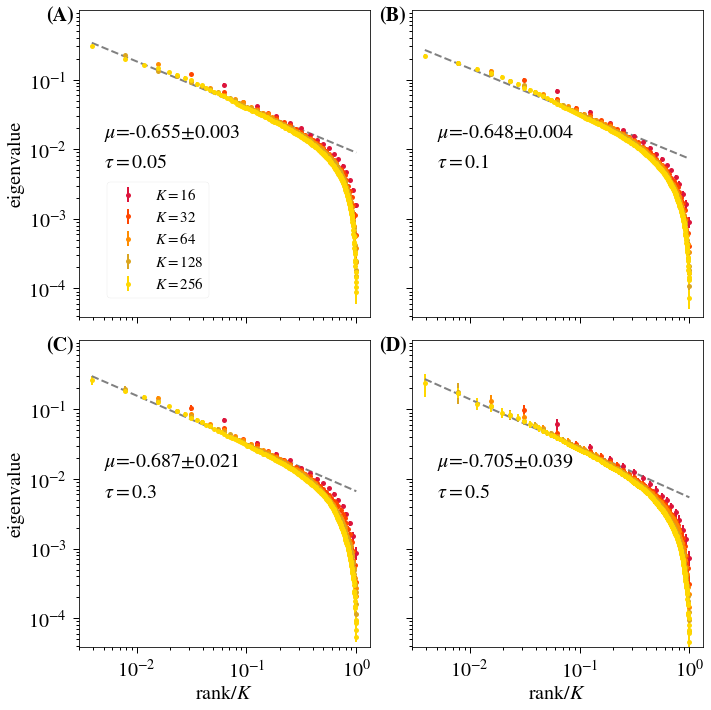

In [7]:
"""
Here plot the eigenvalues from each sucessive RG step, averaged over all clusters and
normalized by cluster size.
"""
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= 'eigenvalue'   
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel('rank$/K$', fontsize=fontsize)
ax[1,1].set_xlabel('rank$/K$', fontsize=fontsize)
c=0
for h in np.array([0,2,6,10]):
    n=int(c/2)
    l=c-2*n
    errplot=allo.eigspecerr[h]
    xplot,plot=(allo.eigspecx[h], allo.eigspec[h])
    for m in range(len(xplot)):
        ax[n,l].errorbar(xplot[m], plot[m], yerr=errplot[m], \
                         label= r'$K=$'+str(2**(m+4)),\
                       color=palit[m+2], marker='o', \
                             markersize=5, linestyle='None', linewidth=2)
    popt=allo.mu[h]
    ax[n,l].plot(xplot[m],linfunc(xplot[m], \
                                popt[0], popt[1]), '--', color=colorfit, linewidth=2)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].text(.005, .015, r'$\mu$='+ str(np.round(popt[1],3))+r'$\pm$'\
               +str(np.round(allo.muerr[h]\
                             [0], 3)), fontsize=ticksize)
    ax[n,l].text(.005, .0055, r'$\tau=$'+str(np.round(allo.label[h],2)), \
                                      fontsize=ticksize)
    ax[n,l].set_yscale('log')
    ax[n,l].set_xscale('log')
    ax[n,l].set_ylim(top=1)
    c+=1
for n in range(2):
    for l in range(2):
        ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].text(.0015,0.7,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.0015,0.7,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.0015,0.7,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.0015,0.7,r'(D)', fontsize=ticksize, weight='bold')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(z, []) for z in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=ticksize-5, loc=(.15,.58))
plt.tight_layout()
name=str(envname)+'eigs.pdf'
plt.savefig(name)

# variance of activity at each RG step over clusters

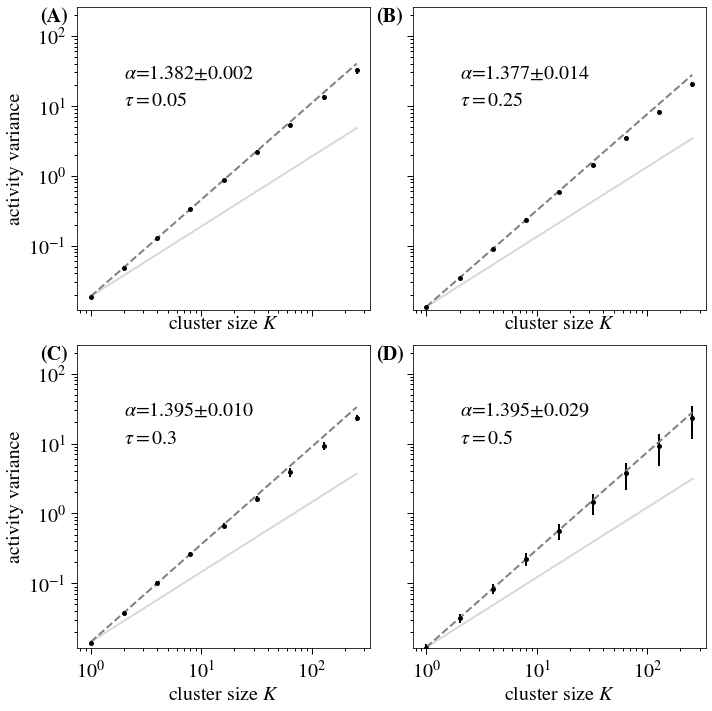

In [7]:
"""
plot coarse grained variance vs. cluster size
"""

fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= 'activity variance' 
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsize)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsize)
c=0  
for h in np.array([0,3,6,10]):
    n=int(c/2)
    l=c-2*n
    ax[n,l].errorbar(allo.varx[h],allo.var[h],  allo.varerr[h], \
                     color='black', marker='o', markersize=5, linewidth=2, linestyle='None')
    popt = allo.alpha[h]
    ax[n,l].plot(allo.varx[h],linfunc(allo.varx[h], \
                                popt[0], popt[1]), '--', color=colorfit, linewidth=2)
    ax[n,l].set_xlabel(r'cluster size $K$', fontsize=fontsize)
    ax[n,l].plot(allo.varx[h], linfunc(allo.varx[h], popt[0], 1.), \
                    color=colorfit, linewidth=2, alpha=alpha)
    ax[n,l].text(2, 10,  r'$\tau=$'+str(np.round(allo.label[h],2)), fontsize=ticksize)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].text(2, 25, r'${\alpha}$='+ str(np.format_float_positional(popt[1],unique=False, precision=3))+r'$\pm$'+\
                   str(np.format_float_positional(allo.alphaerr[h][0], unique=False, precision=3)), fontsize=fontsize)
    ax[n,l].set_yscale('log')
    ax[n,l].set_xscale('log')
    ax[n,l].set_ylim(top=260)
    c+=1
for n in range(2):
    for l in range(2):
        #ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].text(.35,155,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.35,155,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.35, 155,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.35,155,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'var.pdf'
plt.savefig(name)

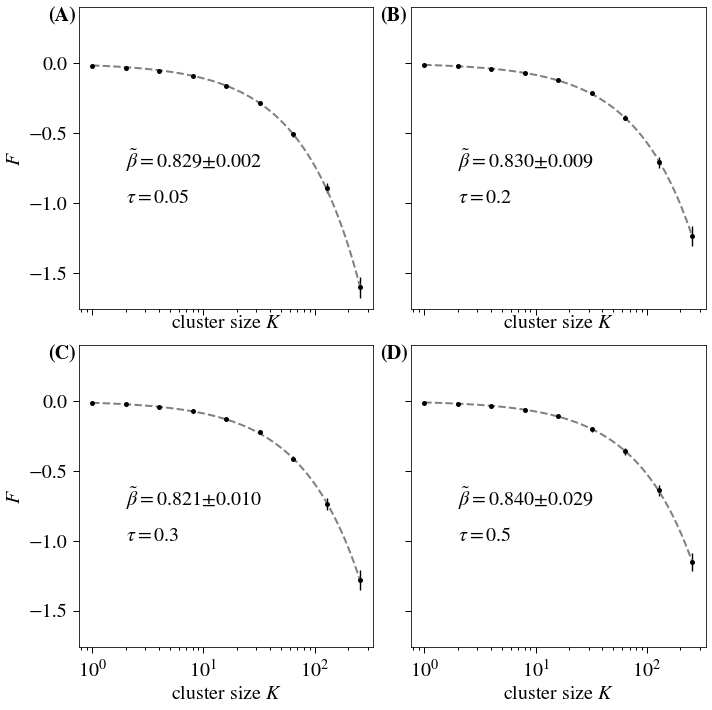

In [8]:
"""
Plot log probability of complete cluster silence vs cluster size
"""
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= r'$F$' 
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsize)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsize)
c=0 
for h in np.array([0,4,6,10]):
    n=int(c/2)
    l=c-2*n
    x=allo.psilx[h]
    y=allo.psil[h]
    popt= allo.beta[h]
    ax[n,l].errorbar(allo.psilx[h], allo.psil[h],allo.psilerr[h], \
                          color='black', marker='o', linestyle='None', markersize=5)
    ax[n,l].plot(np.arange(np.min(allo.psilx[h]),np.max(allo.psilx[h]), .01),\
                 (probfunc(np.arange(np.min(allo.psilx[h]),np.max(allo.psilx[h]), .01), \
                           popt[0], popt[1])), '--', color=colorfit, linewidth=2)
    ax[n,l].text(2, -1.0,r'$\tau=$'+str(np.round(allo.label[h],2)),\
                       fontsize=ticksize)
    ax[n,l].text(2, -.75, r'$\tilde{\beta}=$'+str(np.format_float_positional(popt[1], unique=False, precision=3))+r'$\pm$'+\
                   str(np.format_float_positional(allo.alphaerr[h][0], unique=False, precision=3)),fontsize=ticksize)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].set_xlabel(r'cluster size $K$', fontsize=fontsize)
    ax[n,l].set_xscale('log')
    ax[n,l].set_ylim(top=0.4)
    c+=1
for n in range(2):
    for l in range(2):
        #ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].text(.4,.3,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(.4,.3,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(.4, .3,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(.4,.3,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
name=str(envname)+'freeenergy.pdf'
plt.savefig(name)

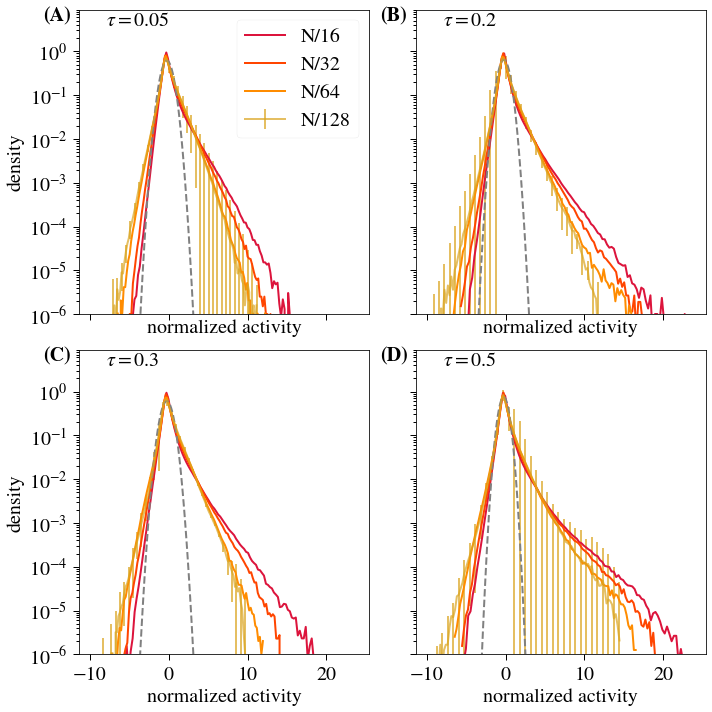

In [10]:
minnm=16
maxxm=128
mrangem=np.abs(minnm-maxxm)
x=allo.actmomx
plott=allo.actmom
plterr=allo.actmomerr
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= r'density'
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel('normalized activity', fontsize=fontsize)
ax[1,1].set_xlabel('normalized activity', fontsize=fontsize)
c=0   
for h in np.array([0,4,6,10]):
    n=int(c/2)
    l=c-2*n
    for i in (np.arange(len(allo.actmomx[0]))):
        if i==3:
            ax[n,l].errorbar(x[h][i],plott[h][i], plterr[h][i], \
                              label='N/'+str(2**(i+4)), \
                          color=palit[i+2], linewidth=2, errorevery=3, alpha=.7)
            popt, pcov = curve_fit(gaussian,x[h][i], plott[h][i])
            ax[n,l].plot(np.arange(-4, 4,.1), \
                    gaussian(np.arange(-4, 4, .1),\
                    popt[0], popt[1]), '--', color=colorfit, linewidth=2)
        else:
            ax[n,l].plot(x[h][i],plott[h][i],  \
                              label='N/'+str(2**(i+4)), \
                          color=palit[i+2], linewidth=2)
    ax[n,l].text(-8, 4, r'$\tau=$'+str(np.round(allo.label[h],2)), \
                           fontsize=ticksize)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].set_xlabel('normalized activity', fontsize=fontsize)
    ax[n,l].set_yscale('log')
    ax[n,l].set_ylim(bottom=10**-6, top=9)
    c+=1
for n in range(2):
    for l in range(2):
        #ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].legend(fontsize=fontsize)
ax[0,0].text(-16,5,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(-16,5,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(-16,5,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(-16,5,r'(D)', fontsize=ticksize, weight='bold')
plt.tight_layout()
plt.tight_layout()
name=str(envname)+'momdist.pdf'
plt.savefig(name)

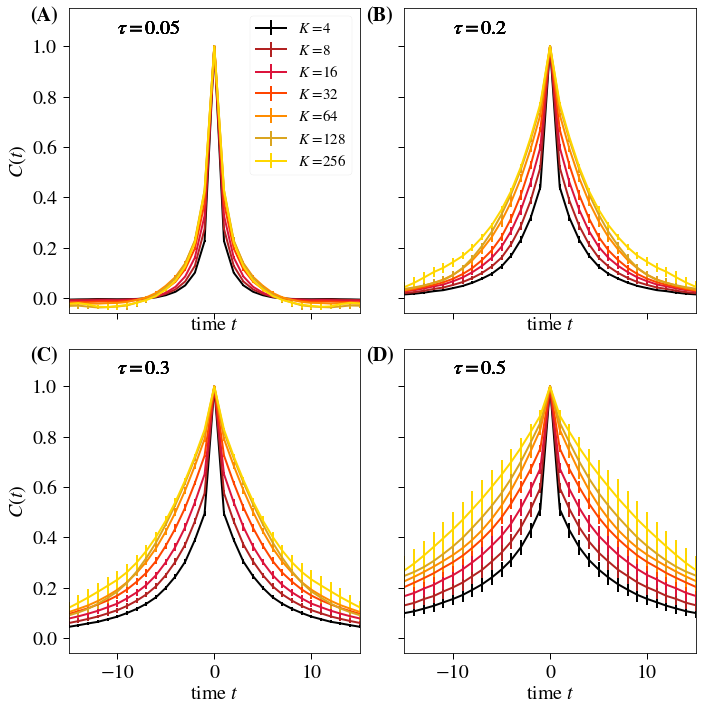

In [12]:
minnm=2
maxxm=256
mrangem=np.abs(minnm-maxxm)
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= r'$C(t)$'
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel(r'time $t$', fontsize=fontsize)
ax[1,1].set_xlabel(r'time $t$', fontsize=fontsize)
c=0   
for h in np.array([0,4,6,10]):
    n=int(c/2)
    l=c-2*n
    for i in range(result[h].shape[0]):
        #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
        ax[n,l].errorbar((x[h][int(result[h].shape[1]/2)-\
                    20:int(result[h].shape[1]/2)+20]), \
                     (result[h][i, int(result[h].shape[1]/2)-20:int(result[h].\
                        shape[1]/2)+20]),\
                       (plterr[h][i][int(result[h].shape[1]/2)-20:int(result[h]\
                                                             .shape[1]/2)+20]), \
                     label=r'$K$ ='+str(2**(i+2)),color=palit[i],\
                             linewidth=2)
        ax[n,l].set_xlabel(r'time $t$', fontsize=fontsize)
        ax[n,l].text(-10, 1.05, r'$\tau=$'+str(np.round(allo.label[h],2)), \
                               fontsize=fontsize)
        ax[n,l].tick_params(labelsize=ticksize)
        ax[n,l].set_ylim(top=1.15)
        ax[n,l].set_xlim(left=-15, right=15)
    c+=1
for n in range(2):
    for l in range(2):
        #ax[n,l].set_yticks([.1, .01,.001,.0001])
        ax[n,l].tick_params(length=6, width=1, which='major')
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].legend(fontsize=fontsize-5)
ax[0,0].text(-19,1.1,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(-19,1.1,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(-19,1.1,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(-19,1.1,r'(D)', fontsize=ticksize, weight='bold')                               
plt.tight_layout()
name=str(envname)+'dynamic.pdf'
plt.savefig(name)

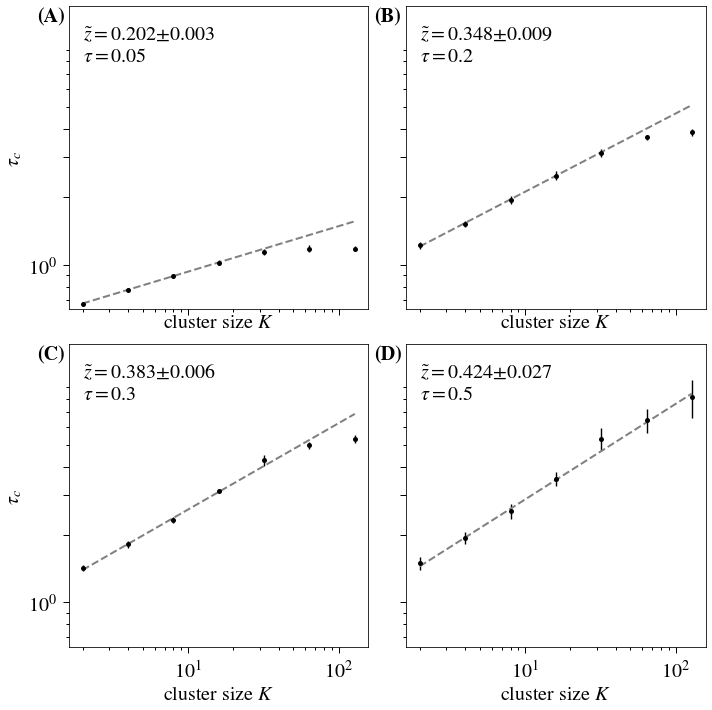

In [9]:
"""
plot exponents
"""
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ylabel= r'$\tau_c$' 
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel(r'cluster size $K$', fontsize=fontsize)
ax[1,1].set_xlabel(r'cluster size $K$', fontsize=fontsize)
c=0                                                                      
for h in np.array([0,4,6,10]):
    n=int(c/2)
    l=c-2*n
    ax[n,l].errorbar(2**np.arange(1,8),allo.tau[h],allo.tauerr[h], color=colorline, \
              label='taus', marker='o', markersize=5, linestyle='None')
    popt= allo.z[h]
    ax[n,l].plot(2**np.arange(1,8), linfunc(2**np.arange(1,8), \
                                    popt[0], popt[1]), '--', label='fit', \
               color=colorfit, linewidth=2)
    ax[n,l].set_xlabel(r'cluster size $K$', fontsize=fontsize)
    ax[n,l].text(2, 10, r'$\tilde{z}=$'+str(np.format_float_positional(popt[1],unique=False, precision=3))+r'$\pm$'+\
                   str(np.format_float_positional(allo.zerr[h][0], unique=False, precision=3)), fontsize=ticksize)
    ax[n,l].set_yscale('log')
    ax[n,l].set_xscale('log')
    ax[n,l].text(2, 8, r'$\tau=$'+str(np.round(allo.label[h],2)), \
                               fontsize=fontsize)
    ax[n,l].set_ylim(top=14)
        
    c+=1
for n in range(2):
    for l in range(2):
        ax[n,l].set_yticks([1,2,3,4])
        ax[n,l].tick_params(length=6, width=1, which='major', labelsize=ticksize)
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].text(1,12,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(1,12,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(1,12,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(1,12,r'(D)', fontsize=ticksize, weight='bold')                               
plt.tight_layout()
name=str(envname)+'dynamicexps.pdf'
plt.savefig(name)

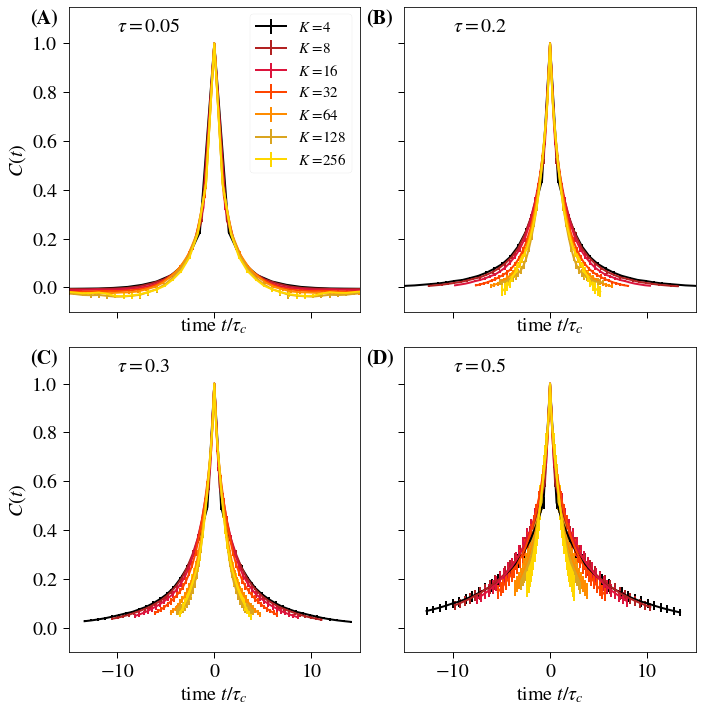

In [14]:
minnm=2
maxxm=256
mrangem=np.abs(minnm-maxxm)
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
ylabel= r'$C(t)$'
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(10,10))
ax[0,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_ylabel(ylabel, fontsize=fontsize)
ax[1,0].set_xlabel(r'time $t/\tau_c$', fontsize=fontsize)
ax[1,1].set_xlabel(r'time $t/\tau_c$', fontsize=fontsize)
c=0          
for h in np.array([0,4,6,10]):
    n=int(c/2)
    l=c-2*n
    for i in range(result[h].shape[0]):
        #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
        ax[n,l].errorbar((x[h][int(result[h].shape[1]/2)-\
                     20:int(result[h].shape[1]/2)+20])/allo.tau[h][i], \
                     (result[h][i, int(result[h].shape[1]/2)-20:int(result[h].\
                        shape[1]/2)+20]),\
                       (plterr[h][i][int(result[h].shape[1]/2)-20:int(result[h]\
                                                                                            .shape[1]/2)+20]), \
                           label=r'$K$ ='+str(2**(i+2)),  color=palit[i],\
                             linewidth=2)
    ax[n,l].set_xlabel(r'time $t/\tau_c$', fontsize=fontsize)
    ax[n,l].text(-10, 1.05, r'$\tau=$'+str(np.round(allo.label[h],2)), \
                               fontsize=fontsize)
    ax[n,l].tick_params(labelsize=ticksize)
    ax[n,l].set_ylim(top=1.15)
    ax[n,l].set_xlim(left=-15, right=15)
    c+=1
for n in range(2):
    for l in range(2):
        ax[n,l].tick_params(length=6, width=1, which='major', labelsize=ticksize)
        ax[n,l].tick_params(length=3, width=1, which='minor')
    #a.grid(True, linewidth=1)
ax[0,0].legend(fontsize=fontsize-5)
ax[0,0].text(-19,1.08,r'(A)', fontsize=ticksize, weight='bold')
ax[0,1].text(-19,1.08,r'(B)', fontsize=ticksize, weight='bold')
ax[1,0].text(-19,1.08,r'(C)', fontsize=ticksize, weight='bold')
ax[1,1].text(-19,1.08,r'(D)', fontsize=ticksize, weight='bold')                               
plt.tight_layout()
name=str(envname)+'dynamicrescale.pdf'
plt.savefig(name)

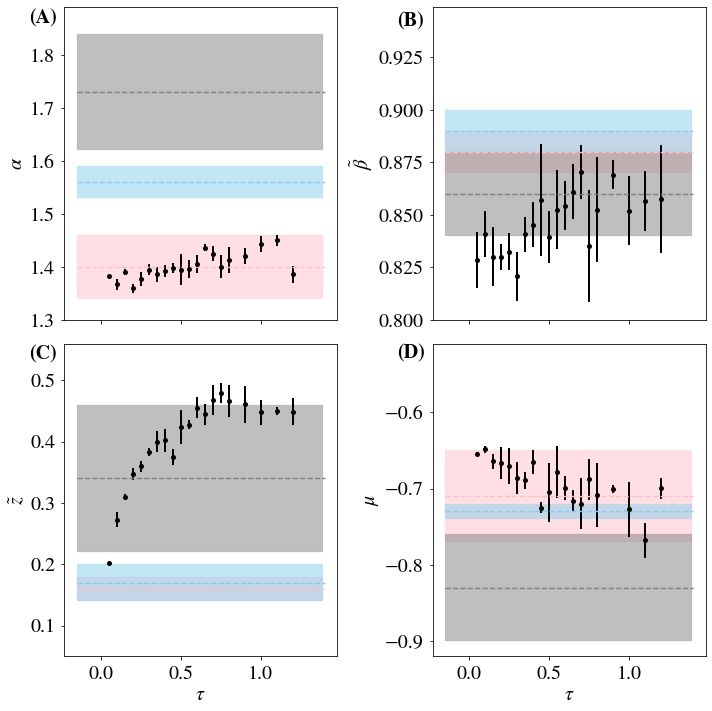

In [7]:
inds=np.arange(20)
plotexps(allo,'timeconst', inds, fontsize, ticksize, 1.89, 1.3, 0.949, 0.8, 0.56, 0.05, -0.51, -0.92, -0.45, 1.86, \
        -0.45, 0.94, -0.45, 0.535, -0.45, -0.53)
name=str(envname)+'varvstimeconst.pdf'
plt.savefig(name)